<a href="https://colab.research.google.com/github/sruthikoyya/Deep-Learning/blob/main/Deep_Neural_Networks(MNIST)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trianing Deep Neural Networks

To improve the model performance we using a  feed-forward neural network which can capture non-linear relationships between inputs and targets.

## Importing Required Libraries

In [1]:
import torch
import numpy as np
import torchvision
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

#Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor']='#ffffff'


Now Download the Dataset and create a PyTorch dataset using the MNIST class from torchvision.datasets

In [2]:
dataset=MNIST(root='data/',download=True,transform=ToTensor())

In [3]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

The images are converted to PyTorch tensors with the shape 1x28x28 (the dimensions represent color channels,width and height). We can use **plt.imshow** to display the images. However.plt.imshow expects channels to be last dimension in an image tensor, so we use the **permute** method to reorder the dimensions of the image

In [4]:
image,label=dataset[0]
image.shape

torch.Size([1, 28, 28])

In [5]:
image.permute(1,2,0).shape

torch.Size([28, 28, 1])

image.shape torch.Size([1, 28, 28])
label 5


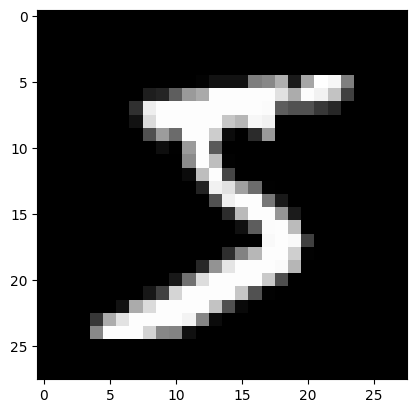

In [6]:
image,label=dataset[0]
print('image.shape',image.shape)
plt.imshow(image.permute(1,2,0),cmap='gray')
print('label',label)

To create the 10000 validation
set we use the random_split helper function

In [7]:
val_size=10000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(50000, 10000)

We can now create PyTorch data loaders for training and validation.
**PyTorch's DataLoader** is a powerful tool for efficiently loading and processing data for training deep learning models. It provides functionalities for batching, shuffling, and processing data, making it easier to work with large datasets

In [8]:
batch_size=128

In [9]:
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Visualize a batch of data in a grid using the make_grid function from torchvision .We'll also use the .permute method on the tensor to move the channels to the last dimension as, expected by matplotlib

In [10]:

'''for images, _ in train_loader:
  print('images.shape:',images.shape)
  print('grid.shape',make_grid(images,nrow=16).shape)
  break'''

"for images, _ in train_loader:\n  print('images.shape:',images.shape)\n  print('grid.shape',make_grid(images,nrow=16).shape)\n  break"

images.shape: torch.Size([128, 1, 28, 28])


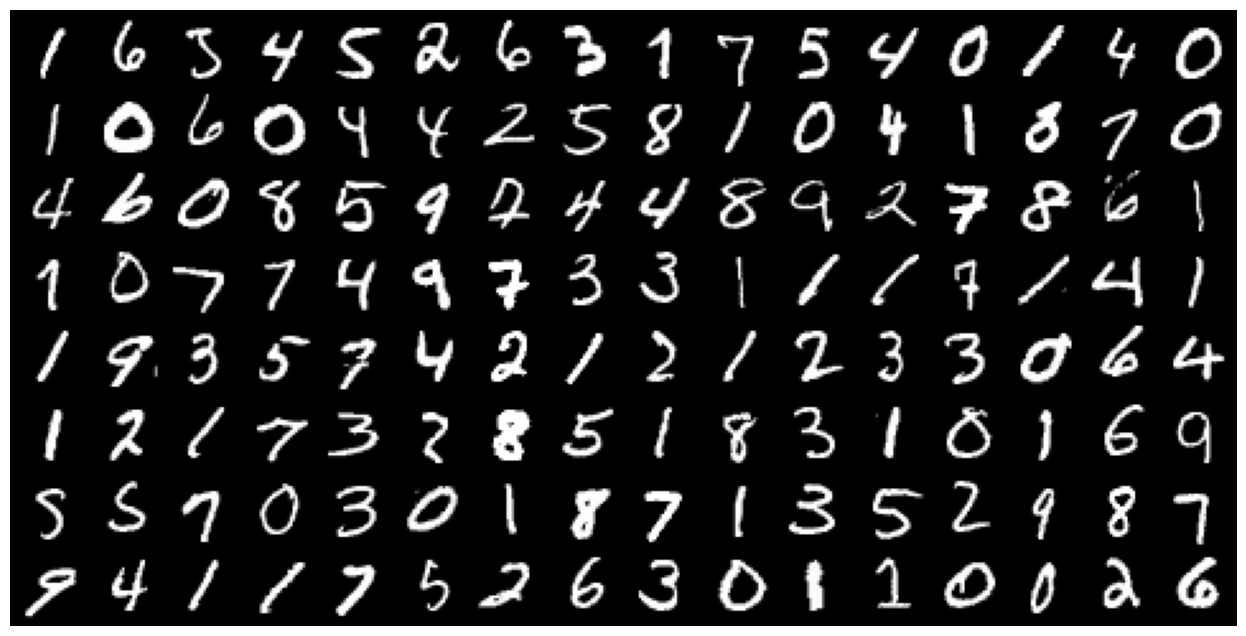

In [11]:
for images, _ in train_loader:
  print('images.shape:',images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images,nrow=16).permute((1,2,0))) #move the channel dimension to end
  break

## Hidden Layers, Activation Functions and Non-Linearity

We'll create a neural network with two layers:a hidden layer and an output layer.Additinally,we'll use an activation function between the two layers.Activation functions can help capture non-linear relationships between inputs and outputs

First,let's create a batch of inputs tensors. we'll flatten the 1x28x28 images into vectors of size 784,so they can be passed into an nn.Linear object

In [12]:
for images,labels in train_loader:
  print('images.shape:',images.shape)
  inputs=images.reshape(-1,784)
  print('inputs.shape:',inputs.shape)
  break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Create a nn.Linear object, which will serve as our hidden layer.We'll set the size of the output from the hidden layer 10 32.This number can be increased to change the learning capacity of the model

In [13]:
input_size=inputs.shape[-1]
hidden_size=32
layer1=nn.Linear(input_size,hidden_size)

We can now compute intermediate outputs for the batch of images by passing inputs through layer1

In [14]:
inputs.shape

torch.Size([128, 784])

In [15]:
layer1_outputs=layer1(inputs)
print('layer1_outputs.shape',layer1_outputs.shape)

layer1_outputs.shape torch.Size([128, 32])


The image vectors of size  784 are transformed into intermediate output vectors of length 32 by performing a matrix multiplication of inputs matrix with the transposed weights matrix of layer1 and adding the bias.We can verify this using torch.allclose.

In [16]:
layer1_outputs_direct=inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

Checking the pytorch built in functions and normal calculations

In [17]:
torch.allclose(layer1_outputs,layer1_outputs_direct, 1e-3)

True

Thus layer1_outputs and inputs have a linear relationship, i.e., each element of layer_outputs is a weighted sum of elements from inputs. Thus ,even as we train the model and modify the weights, layer1 can only capture linear relationship between inputs and outputs

Next we'll use the Rectified Linear Unit(ReLU) function as the activation function for the outputs. It has the formula relu(x)=max(0,x) i.e. it simply replace negative values in a given tensor with the value 0. ReLU is a non-linear function.

we can use the F.relu method to apply ReLU to the elements of a tensor

In [18]:
F.relu(torch.tensor([[1,-1,0],[-0.1,0.2,3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

Let's apply the activation function to layer1_outputs and verify that negative values were replaced with 0.

In [19]:
layer1_outputs.shape

torch.Size([128, 32])

In [20]:
relu_outputs=F.relu(layer1_outputs)
print('relu_outputs.shape',relu_outputs.shape)
print('min(layer1_outputs):',torch.min(layer1_outputs).item())
print('min(relu_outputs):',torch.min(relu_outputs).item())

relu_outputs.shape torch.Size([128, 32])
min(layer1_outputs): -0.704793393611908
min(relu_outputs): 0.0


Now that we've applied a non-linear activation function, relu_outputs and inputs do not have a linear relationship. We refer to ReLU as the activation function ,because for each input certain outputs are activated (those with non-ero) while others turned off(those with zero values).

Next we need to create an output layer to convert vectors of length hidden_size in relu_outputs into vectors of length 10, which is the desired output of our model (since there  are 10 target labels).

In [21]:
output_size=10
layer2=nn.Linear(hidden_size,output_size)

In [22]:
inputs.shape

torch.Size([128, 784])

In [23]:
relu_outputs.shape

torch.Size([128, 32])

In [24]:
layer2_outputs=layer2(relu_outputs)
print('layer2_outputs.shape',layer2_outputs.shape)

layer2_outputs.shape torch.Size([128, 10])


In [25]:
inputs.shape

torch.Size([128, 784])

As expected, layer2_outputs contains a batch of vectors of size 10. We can now use this output to compute the loss using F.cross_entropy and adjust the weights of layer1  and layer2 using gradient descent.

In [26]:
F.cross_entropy(layer2_outputs,labels)

tensor(2.2980, grad_fn=<NllLossBackward0>)


This ,our model trasforms inputs into layer2_outputs by applying a linear transformation (using layer1), followed by a non-linear activation(using F.relu), followed by another linear transformation (using layer2). Let's verigy this by re-computing the output using basic matrix operation.

If we hadn't include a non-linear activation between the two linear layers, the final relationship between inputs and outputs would still be linear. A simple refactoring of the computations illustrates this.

In [27]:
#same as layer2(layer1(inputs))
outputs2=(inputs @ layer1.weight.t() + layer1.bias)@ layer2.weight.t() + layer2.bias


In [28]:
#Create a single layer to replace the two linear layers
combined_layer=nn.Linear(input_size,output_size)
combined_layer.weight.data=layer2.weight @ layer1.weight
combined_layer.bias.data=layer2.bias + layer1.bias @ layer2.weight.t()


In [29]:
#Same as combined_layer(inputs)
outputs3=inputs @ combined_layer.weight.t() + combined_layer.bias

In [30]:
torch.allclose(outputs2, outputs3,1e-3)

True

# MODEL

We are now ready to define out model. As discused above, we'll create a neural network with one hidden layer.Here's what that means:



* Insted of using a single nn.Linear object to transform a batch of inputs(pixel intensities) into outputs(class probabilities),we'll use two nn.Linear objects. Each of these is called a layer in the network.
* The first layer(also know as the hidden layer) will transform the input matrix of shape batch_size x 784 into an intermediate output matrix of shape batch_size x hidden_size. The parameter hidden_size can be configured manually(eg 32 or 64)
* we'll then apply a non-linear activation function to the intermediate outputs. The activation function transforms individual elements of the matrix.
* The result of the activation function, which is also of size batch_size x hidden_size, is passed into the second layer (also known as the output layer). The second layer transforms it into a matrix of size batch_size x10. We can use this output to compute the loss and adjust weights using gradient descent.



Let's define the model by extending the nn.Module class from PyTorch

In [31]:
class MnistModel(nn.Module):
  """Feedforward neural network with 1 hidden layer"""
  def __init__(self,in_size,hidden_size,out_size):
    super().__init__()
    #hiden layer
    self.linear1=nn.Linear(in_size,hidden_size)
    #output layer
    self.linear2=nn.Linear(hidden_size,out_size)
  def forward(self,xb):
    #Plantten the image tensor
    xb=xb.view(xb.size(0),-1)
    #Get intermediate outputs using hidden layer
    out=self.linear1(xb)
    #Apply activation function
    out=F.relu(out)
    # Get predictions using output layer
    out=self.linear2(out)
    return out
  def training_step(self,batch):
    """Return the loss for a bath of training data"""
    images,labels=batch
    out=self(images) # Generate predictions
    loss=F.cross_entropy(out,labels) #calculate loss
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)   #Generate predictions
    loss=F.cross_entropy(out,labels) #Calculate loss
    acc= accuracy(out,labels)  #Calculate accuracy
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_loss=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_loss).mean() #Combine losses
    batch_acc=[x['val_acc'] for x in outputs]
    epoch_acc=torch.stack(batch_acc).mean() #Combine accuracies
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, result):
    """Print the metrics at the end of an epoch"""
    train_loss = result.get('train_loss', None)  # Safely access train_loss
    if train_loss is not None:
      print(f"Epoch [{epoch}], train_loss: {train_loss:.4f}, val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")
    else:
      print(f"Epoch [{epoch}], val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")
  """def epoch_end(self,epoch,result):
    print("Epoch [{}],train_loss:{:.4f},val_loss:{:.4f},val_acc:{:.4f}".format(epoch,result['train_loss'],result['val_loss'],result['val_acc']))

"""



We also need to define an accuracy function which calculates the accuracy of the model's prediciton on an batch of inputs.It's used on validation_step above

In [32]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

We'll create a model that contains a hidden layer with 32 activations

In [33]:
input_size=784
hidden_size=32
num_classes=10

In [34]:
model=MnistModel(input_size,hidden_size=32, out_size=num_classes)

Let's take a look at the model's parameters. We expect to see one weight and bias matrix for each of the layers.

In [35]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


Let's try and generate some outputs using out model. We'll take the first batch of 128 images from our dataset and pass them onto out model.

In [36]:
for images,labels in train_loader:
  outputs=model(images)
  loss=F.cross_entropy(outputs,labels)
  print('Loss:',loss.item())
  break
print('outputs.shape:',outputs.shape)
print('Smaple outputs :\n',outputs[:2].data)


Loss: 2.2944843769073486
outputs.shape: torch.Size([128, 10])
Smaple outputs :
 tensor([[ 0.1270,  0.0625,  0.1576,  0.1963,  0.1189, -0.0011,  0.1491, -0.1716,
          0.1063,  0.1572],
        [ 0.1461,  0.0029,  0.2071,  0.1378,  0.1399,  0.0063,  0.0553, -0.1183,
          0.0465,  0.0852]])


# Using GPU

As the sizes of our models and datsets increase, we need to use GPUs to train our models within a  resonable amount of time.GPUs contain hundreds of cores optimized for performing expensive matrix operations on floating point numbers quickly, making them ideal for training deep neural networks.

In [37]:
torch.cuda.is_available()

True

let's dafine a helper function to ensure that out code uses the GPU if avialable and defaults to using the CPU if it isn't

In [38]:
def get_default_device():
  """Pick GPU if availabel else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')



In [39]:
device=get_default_device()
device

device(type='cuda')

Nwxt,let's define a function that can move data and model to a choosen device


In [40]:
def to_device(data,device):
  """Move tensor(s) to choosen device"""
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)


In [41]:
for images,labels in train_loader:
  print(images.shape)
  print(images.device)
  images=to_device(images,device)
  print(images.device)
  break

torch.Size([128, 1, 28, 28])
cpu
cuda:0


Finally we define a DeviceDataLoader class to wrap our existing data loader and move batchs of data to the selected device. Interestingly we don't need  to extend an existing class to create a PyTorch dataloader. All we need is na __iner__ method to retrieve batches of data and an __len__ method to get the number of batches.

In [42]:
class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device

  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)


The Yeild keyword in Python is used to create a generator function that can be within a for loop as illustrated bellow

In [43]:
def some_numbers():
  yield 10
  yield 20
  yield 30
for value in some_numbers():
  print(value)

10
20
30


We can now wrap our data loaders using DeviceDataLoader

In [44]:
train_loader=DeviceDataLoader(train_loader,device)
val_loader=DeviceDataLoader(val_loader,device)

Tensor moved to the GPU have a device property which include that word cuda.Let's verify this by looking at a batch of data from valid_dl

In [45]:
for xb,yb in val_loader:
  print('xb.device:',xb.device)
  print('yb:',yb)
  break

xb.device: cuda:0
yb: tensor([9, 0, 1, 5, 5, 2, 0, 6, 0, 1, 2, 2, 0, 5, 2, 9, 9, 7, 1, 5, 8, 8, 9, 7,
        9, 2, 8, 2, 2, 8, 8, 9, 9, 3, 7, 7, 0, 3, 4, 1, 1, 4, 7, 5, 9, 2, 5, 5,
        6, 0, 6, 7, 8, 5, 0, 5, 4, 3, 0, 8, 1, 8, 1, 8, 0, 1, 5, 8, 9, 1, 6, 6,
        8, 0, 7, 3, 2, 8, 1, 0, 4, 4, 3, 1, 4, 7, 7, 3, 3, 3, 8, 5, 7, 0, 7, 2,
        1, 9, 9, 5, 2, 6, 5, 6, 0, 1, 1, 2, 3, 1, 2, 8, 0, 3, 7, 8, 3, 0, 3, 3,
        4, 7, 2, 5, 3, 8, 5, 3, 7, 7, 8, 7, 0, 8, 9, 2, 8, 7, 8, 4, 8, 3, 3, 2,
        3, 5, 1, 2, 6, 6, 6, 5, 4, 7, 2, 6, 0, 8, 8, 5, 8, 4, 6, 7, 5, 4, 4, 5,
        8, 3, 3, 5, 9, 1, 6, 1, 9, 6, 1, 2, 2, 3, 8, 8, 1, 5, 7, 0, 4, 4, 6, 9,
        9, 6, 5, 9, 2, 8, 6, 1, 6, 9, 8, 1, 8, 7, 8, 0, 3, 2, 3, 7, 4, 6, 9, 6,
        4, 8, 4, 5, 2, 4, 2, 0, 9, 6, 4, 2, 6, 7, 7, 8, 2, 7, 4, 6, 7, 7, 1, 9,
        0, 3, 9, 7, 2, 5, 5, 6, 4, 2, 7, 9, 4, 5, 2, 6], device='cuda:0')


# Traning the Model

We'll define two functions: **fit** and **evaluate**  to train the model using gradient descent and evaluate its performance on the validation set.

In [46]:
def evaluate(model,val_loader):
  """ Evaluate the model's performance on the validation set"""
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  """ Train the model using gradient descent"""
  history=[]
  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    #Training Phase
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step() #perform gradient descent all weights and biases are updated
      optimizer.zero_grad()
    #Validation Phase
    result=evaluate(model,val_loader)
    model.epoch_end(epoch,result)
    history.append(result)
  return history



Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device(CPU or GPU) . We can reuse the ot_device function to move the model's parameters to the right device

In [47]:
#Model (on GPU)
model=MnistModel(input_size, hidden_size=hidden_size,out_size=num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Let's see how the model performs on the validation set with the inintial set of weights and biases

In [48]:
history=[evaluate(model,val_loader)]
history

[{'val_loss': 2.306612014770508, 'val_acc': 0.10361327975988388}]

The initial accuracy us around 10% , as one might expect from a randomly inintialized model(since it has a 1 in 10 chance of getting a label right by guessing randomly)

let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5

In [49]:
history+=fit(5,0.5,model,train_loader,val_loader)

Epoch [0], val_loss: 0.2139, val_acc: 0.9388
Epoch [1], val_loss: 0.1635, val_acc: 0.9528
Epoch [2], val_loss: 0.1450, val_acc: 0.9565
Epoch [3], val_loss: 0.1502, val_acc: 0.9553
Epoch [4], val_loss: 0.1555, val_acc: 0.9550


96% is pretty good! let's train the model for five more epochs at a lower learnning rate or 0.1 to improve the accuracy further

In [50]:
history+=fit(5,0.1,model,train_loader,val_loader)

Epoch [0], val_loss: 0.1138, val_acc: 0.9657
Epoch [1], val_loss: 0.1123, val_acc: 0.9659
Epoch [2], val_loss: 0.1131, val_acc: 0.9654
Epoch [3], val_loss: 0.1111, val_acc: 0.9664
Epoch [4], val_loss: 0.1100, val_acc: 0.9664


We can now plot the losses and accuracies to study how the model improves over time

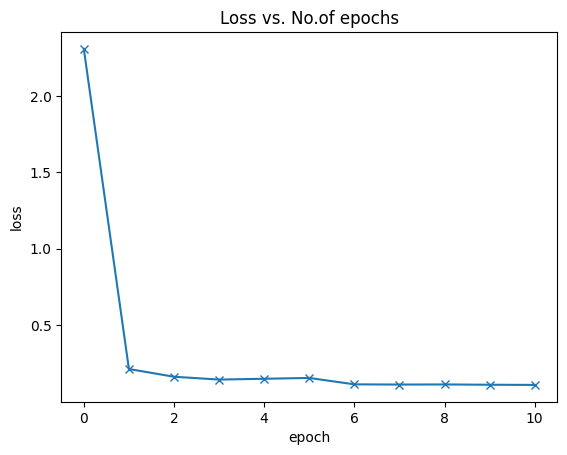

In [52]:
losses=[x['val_loss'] for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No.of epochs');

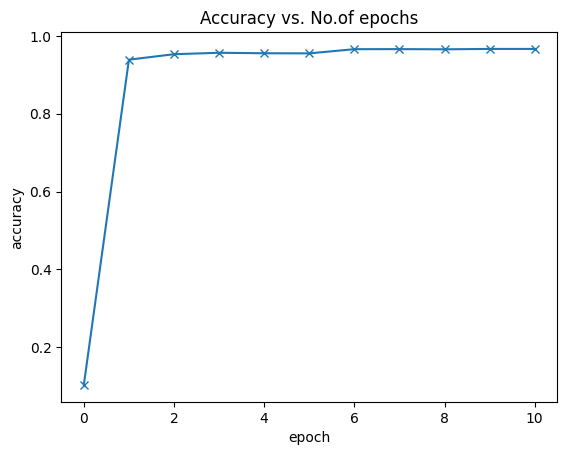

In [53]:
accuracies=[x['val_acc'] for x in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No.of epochs');

Our current model outperforms the logistic regression model(which could only achieve around 86% accuracy) by a considerable margin it quickly reaches an accuracy 97% but doesn't improve much beyond this. To improve accuracy further, we need to make the model more powerful by increasing the hidden layer's size or adding more hidden layers with activations.

# Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test our model with some images from the predefined test dataset of 10000 iamges.We begin by creating the test dataset with the ToTensor transform

In [55]:
#define test dataset
test_dataset=MNIST(root='data/',train=False,transform=ToTensor())

Let's define a helper function predict_image , which results the predicted label for a single image tensors

In [59]:
def predict_image(img,model):
  xb=to_device(img.unsqueeze(0),device)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()

Let's try it out with a few images.

Label:  7 Predicted:  7


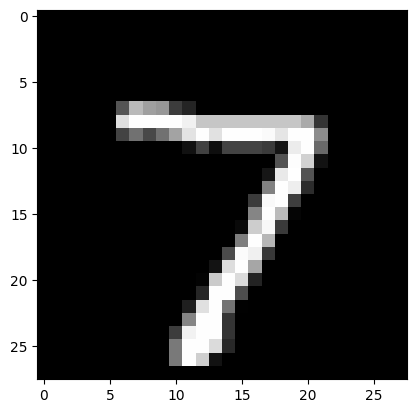

In [60]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,'Predicted: ',predict_image(img,model))

Label:  9 Predicted:  9


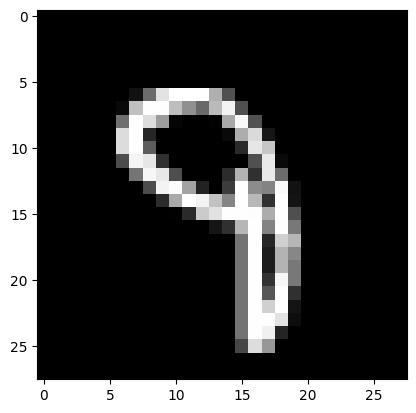

In [61]:
img,label=test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,'Predicted: ',predict_image(img,model))

Label:  2 Predicted:  2


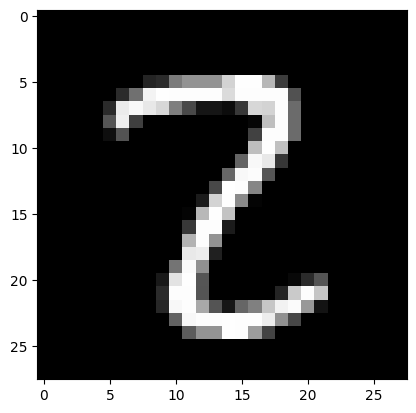

In [62]:
img,label=test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,'Predicted: ',predict_image(img,model))

Label:  6 Predicted:  6


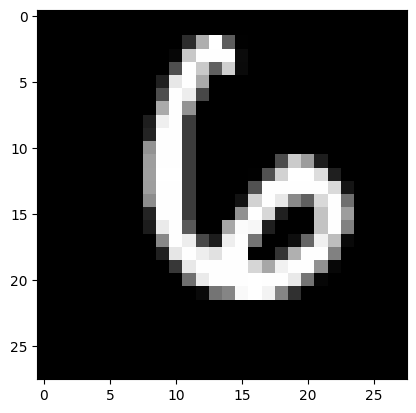

In [63]:
img,label=test_dataset[88]
plt.imshow(img[0],cmap='gray')
print('Label: ',label,'Predicted: ',predict_image(img,model))

As a final step,let's also look at the overall loss and accuracy of the model on the test set.

In [64]:
test_loader=DeviceDataLoader(DataLoader(test_dataset, batch_size=256),device)
result=evaluate(model,test_loader)
result

{'val_loss': 0.10231154412031174, 'val_acc': 0.9703124761581421}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set( which often comes from real world data)